In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [25]:

"""The file path here will will be different on your own machine""" 

df = pd.read_csv("C:/Users/Sean/Documents/GitHub/DataMining-Project/loan_final.csv")

In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0)

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

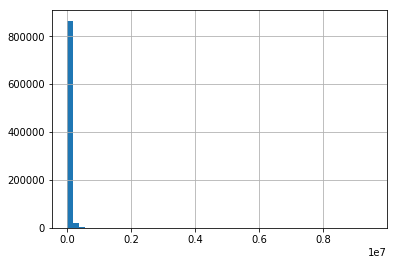

In [27]:
df['annual_inc'].hist(bins=50)

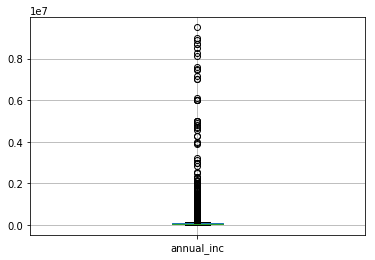

In [28]:
df.boxplot(column='annual_inc')

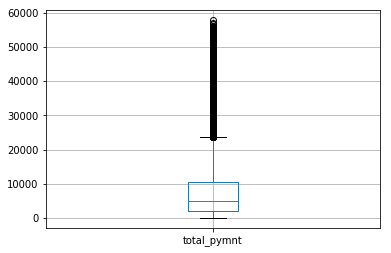

In [38]:
df.boxplot(column='total_pymnt')

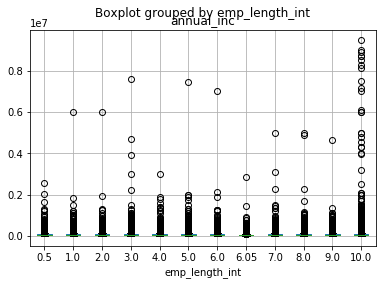

In [29]:
df.boxplot(column='annual_inc', by = 'emp_length_int')

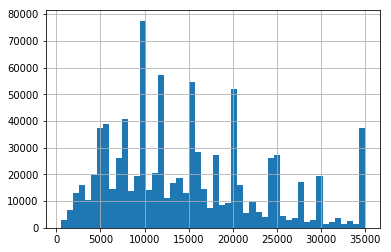

In [30]:
df['loan_amount'].hist(bins=50)

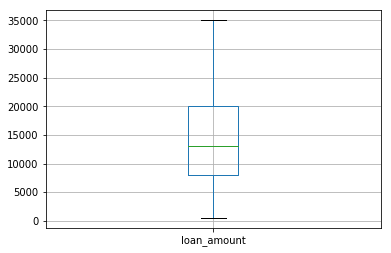

In [31]:
df.boxplot(column='loan_amount')

In [14]:
"""this is not working properly as im not comparing the correct values(i think)"""

temp1 = df['interest_payments'].value_counts(ascending=True)
temp2 = df.pivot_table(values='loan_condition',index=['interest_payment_cat'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
High    422063
Low     465316
Name: interest_payments, dtype: int64

Probility of getting loan for each Credit History class:
Empty DataFrame
Columns: []
Index: [1, 2]


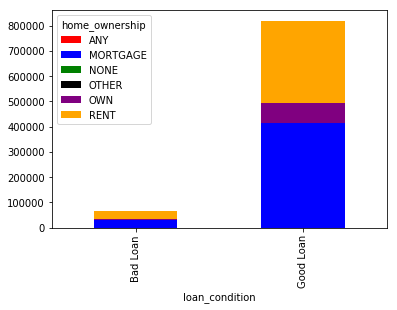

In [33]:
"""Loan condition with home ownership"""

temp = pd.crosstab(df['loan_condition'], df['home_ownership'])
temp.plot(kind='bar', stacked=True, color=['red','blue','green','Black','purple','orange'], grid=False)

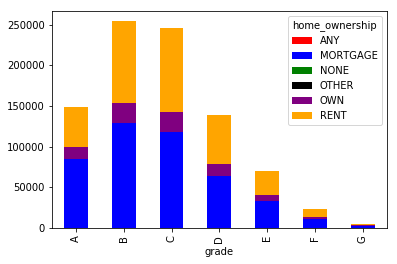

In [53]:
"""load grade with home ownership"""

temp1 = pd.crosstab(df['grade'], df['home_ownership'])
temp1.plot(kind='bar', stacked=True, color=['red','blue','green','Black','purple','orange'], grid=False)

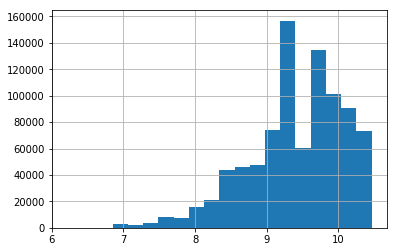

In [34]:
"""Data Munging"""
df['LoanAmount_log'] = np.log(df['loan_amount'])
df['LoanAmount_log'].hist(bins=20)


In [45]:
"""not sure why this is showing no zero values as the data set on Kaggle show zero values""" 

df.apply(lambda x: sum(x.isnull()),axis=0) 

id                            0
year                          0
issue_d                       0
final_d                       0
emp_length_int                0
home_ownership                0
home_ownership_cat            0
income_category               0
annual_inc                    0
income_cat                    0
loan_amount                   0
term                          0
term_cat                      0
application_type              0
application_type_cat          0
purpose                       0
purpose_cat                   0
interest_payments             0
interest_payment_cat          0
loan_condition                0
loan_condition_cat            0
interest_rate                 0
grade                         0
grade_cat                     0
dti                           0
total_pymnt                   0
total_rec_prncp               0
recoveries                    0
installment                   0
region                        0
LoanAmount_log                0
TotalInt

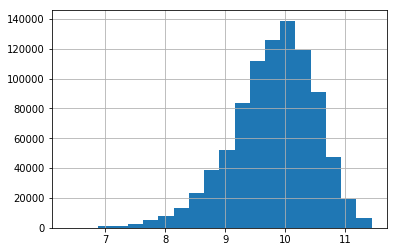

In [46]:
"""Show the total amount paid back"""

df['TotalPaid'] = df['total_pymnt'] + df['loan_amount']
df['TotalPaid_log'] = np.log(df['TotalPaid'])
df['TotalPaid_log'].hist(bins=20) 

In [37]:
from sklearn.preprocessing import LabelEncoder